In [1]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

#!pip3 install fbprophet
#!pip install fbprophet
#!pip install pystan==2.19.1.1 --quiet
#!pip install fbprophet --quiet
#!pip install fbprophet
!pip install yfinance --quiet
!pip3 install pystan 
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 932.9 kB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from pandas import read_csv
from datetime import datetime
	
df = pd.read_csv('/content/drive/MyDrive/dataAir_newavg.csv', usecols=[0,1,2,3,4,5,6,7,8,9],parse_dates=['date'], skipinitialspace=True)
df 

,date,pm10,co,no2,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,49,0.984565,29.330435,21.0,27.1,70,1009.40,100.0,9.0
1,2018-01-02,57,1.016304,35.128261,26.0,27.5,67,1009.40,120.0,4.0
2,2018-01-03,74,1.292083,43.541667,38.0,28.2,66,1009.40,60.0,4.0
3,2018-01-04,85,1.308261,42.458696,39.0,29.3,64,1009.40,330.0,6.0
4,2018-01-05,92,1.175000,48.797826,51.0,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,50,1.000000,27.800000,14.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,58,1.100000,31.650000,17.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,58,0.900000,33.900000,18.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,73,1.100000,44.900000,29.0,30.0,62,1009.24,120.0,13.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1765 non-null   int64         
 2   co                1765 non-null   float64       
 3   no2               1765 non-null   float64       
 4   pm25              1708 non-null   float64       
 5   avgT              1695 non-null   float64       
 6   humid             1765 non-null   int64         
 7   pressure-monthly  1765 non-null   float64       
 8   windDir           1735 non-null   float64       
 9   windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 138.0 KB


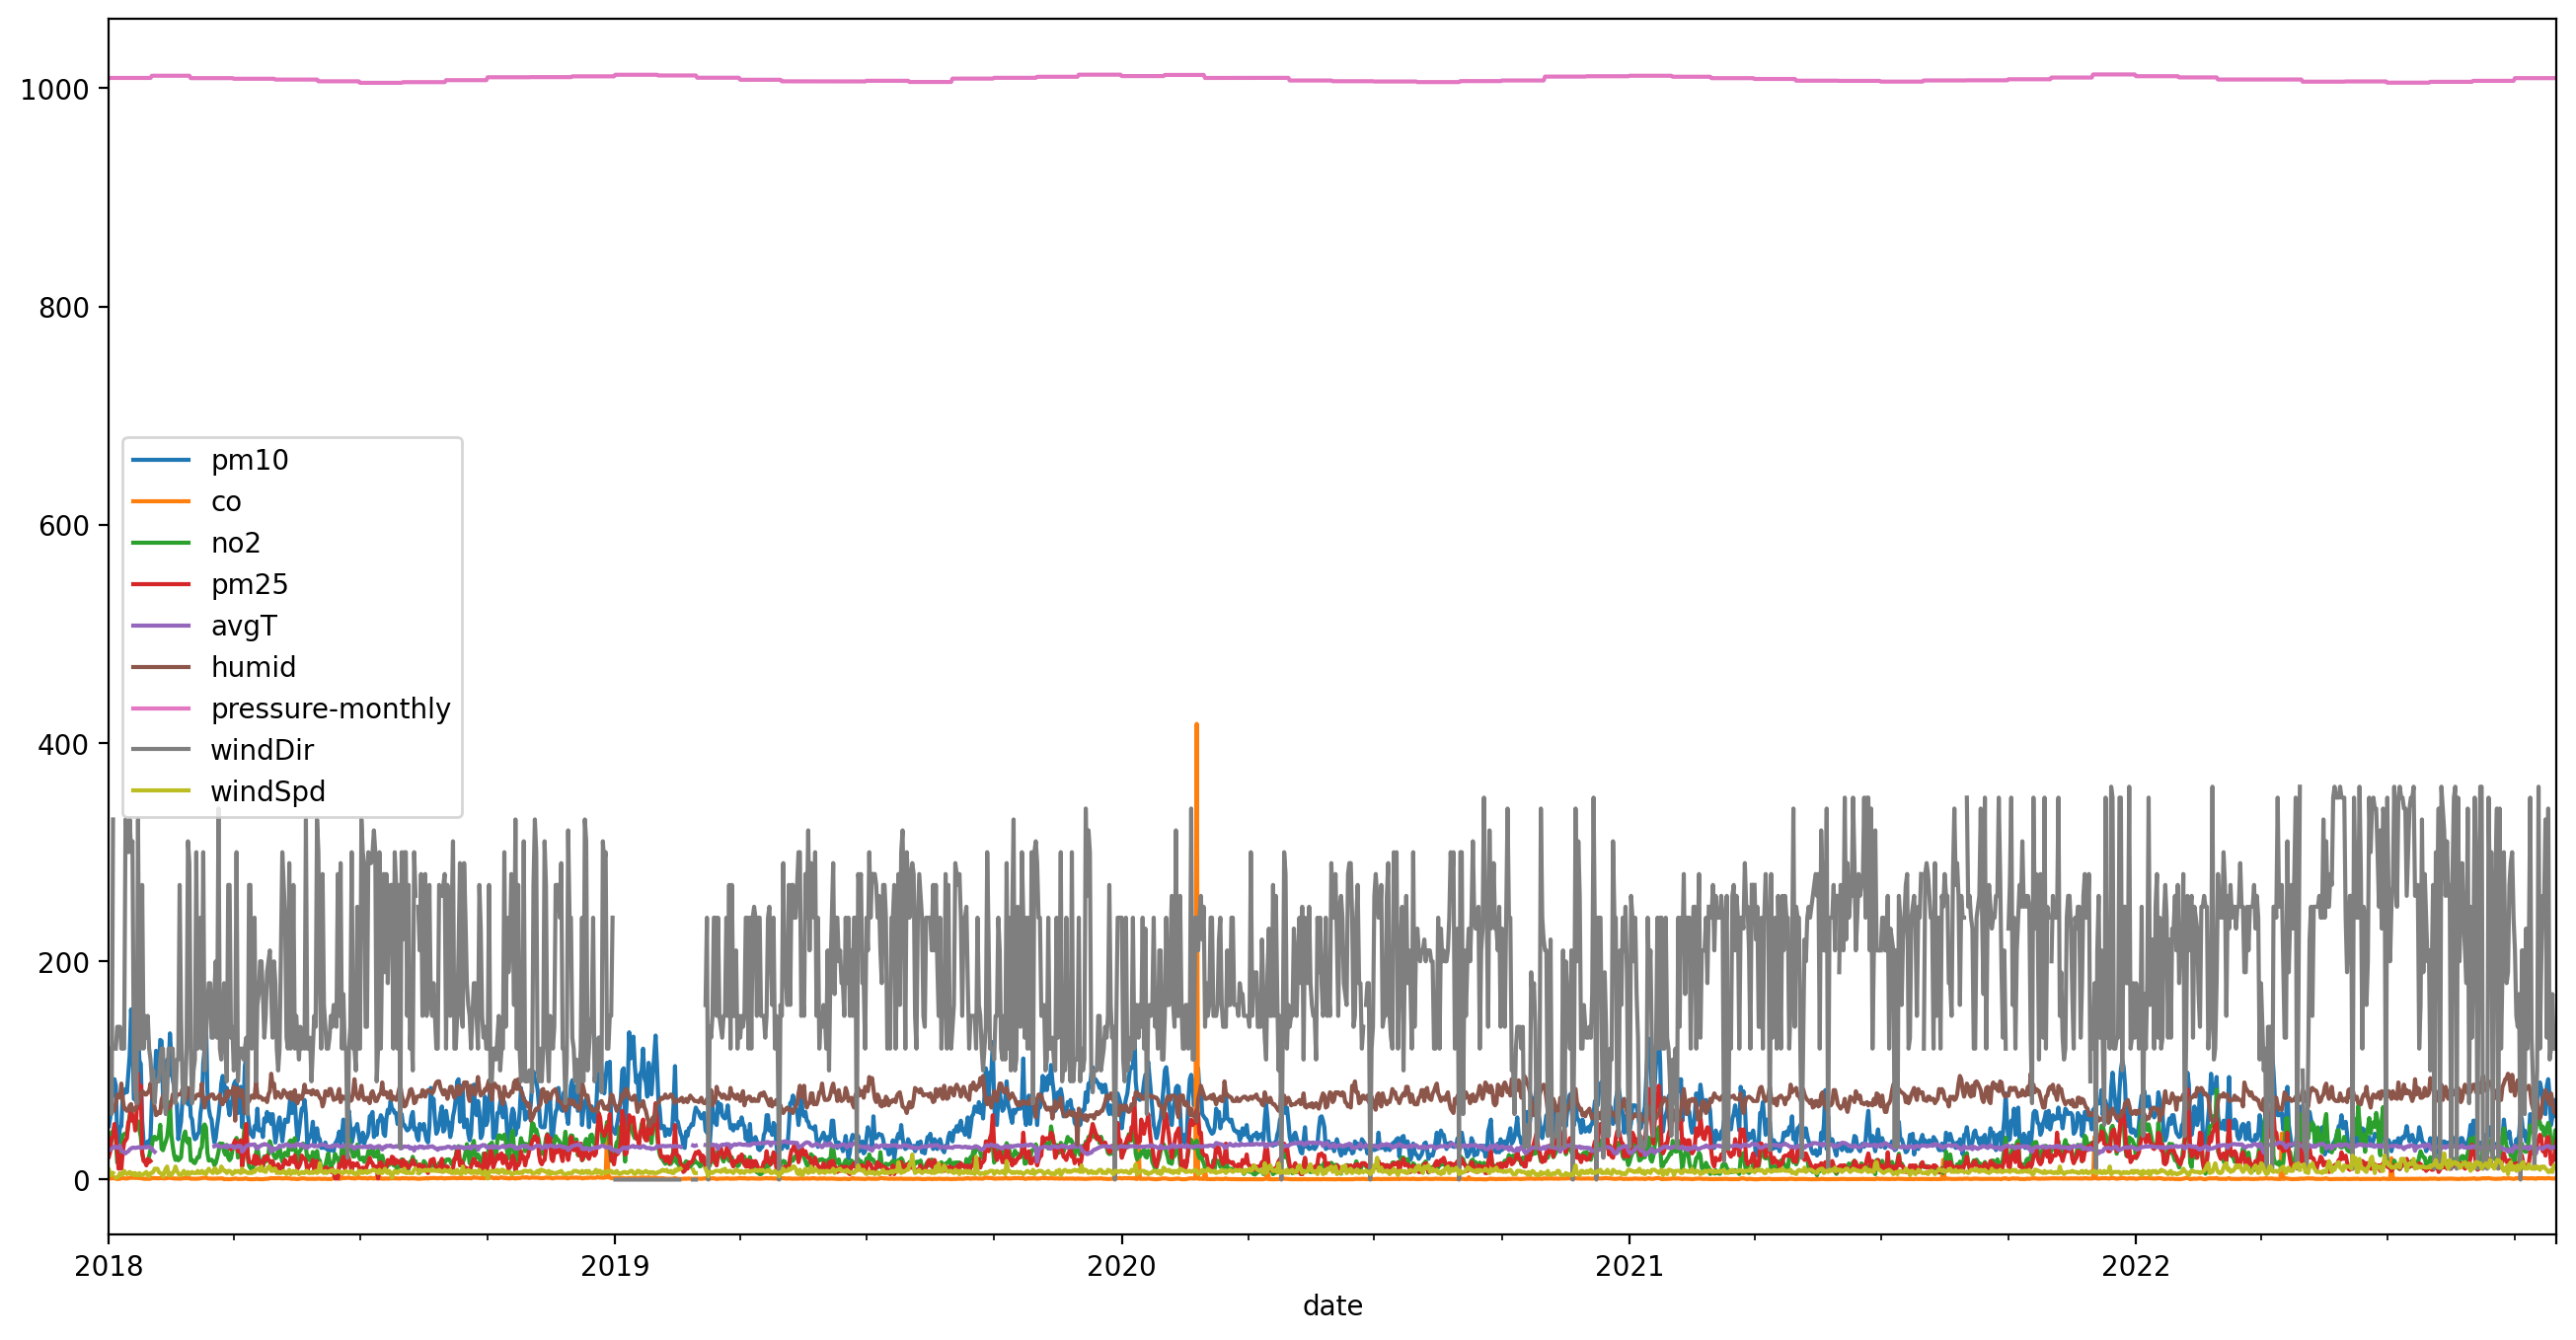

In [6]:
df.set_index('date').plot(figsize=(16, 8));

In [7]:
data = df.sort_values('date').reset_index(drop=True).copy()
data

,date,pm10,co,no2,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,49,0.984565,29.330435,21.0,27.1,70,1009.40,100.0,9.0
1,2018-01-02,57,1.016304,35.128261,26.0,27.5,67,1009.40,120.0,4.0
2,2018-01-03,74,1.292083,43.541667,38.0,28.2,66,1009.40,60.0,4.0
3,2018-01-04,85,1.308261,42.458696,39.0,29.3,64,1009.40,330.0,6.0
4,2018-01-05,92,1.175000,48.797826,51.0,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,50,1.000000,27.800000,14.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,58,1.100000,31.650000,17.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,58,0.900000,33.900000,18.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,73,1.100000,44.900000,29.0,30.0,62,1009.24,120.0,13.0


In [8]:
y_col = 'pm25'

In [9]:
data.dropna(subset=[y_col], inplace=True)
data

,date,pm10,co,no2,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,49,0.984565,29.330435,21.0,27.1,70,1009.40,100.0,9.0
1,2018-01-02,57,1.016304,35.128261,26.0,27.5,67,1009.40,120.0,4.0
2,2018-01-03,74,1.292083,43.541667,38.0,28.2,66,1009.40,60.0,4.0
3,2018-01-04,85,1.308261,42.458696,39.0,29.3,64,1009.40,330.0,6.0
4,2018-01-05,92,1.175000,48.797826,51.0,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,50,1.000000,27.800000,14.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,58,1.100000,31.650000,17.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,58,0.900000,33.900000,18.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,73,1.100000,44.900000,29.0,30.0,62,1009.24,120.0,13.0


In [10]:
df = data[['date', y_col]]
df.columns=['ds', 'y']
df

,ds,y
0,2018-01-01,21.0
1,2018-01-02,26.0
2,2018-01-03,38.0
3,2018-01-04,39.0
4,2018-01-05,51.0
...,...,...
1760,2022-10-27,14.0
1761,2022-10-28,17.0
1762,2022-10-29,18.0
1763,2022-10-30,29.0


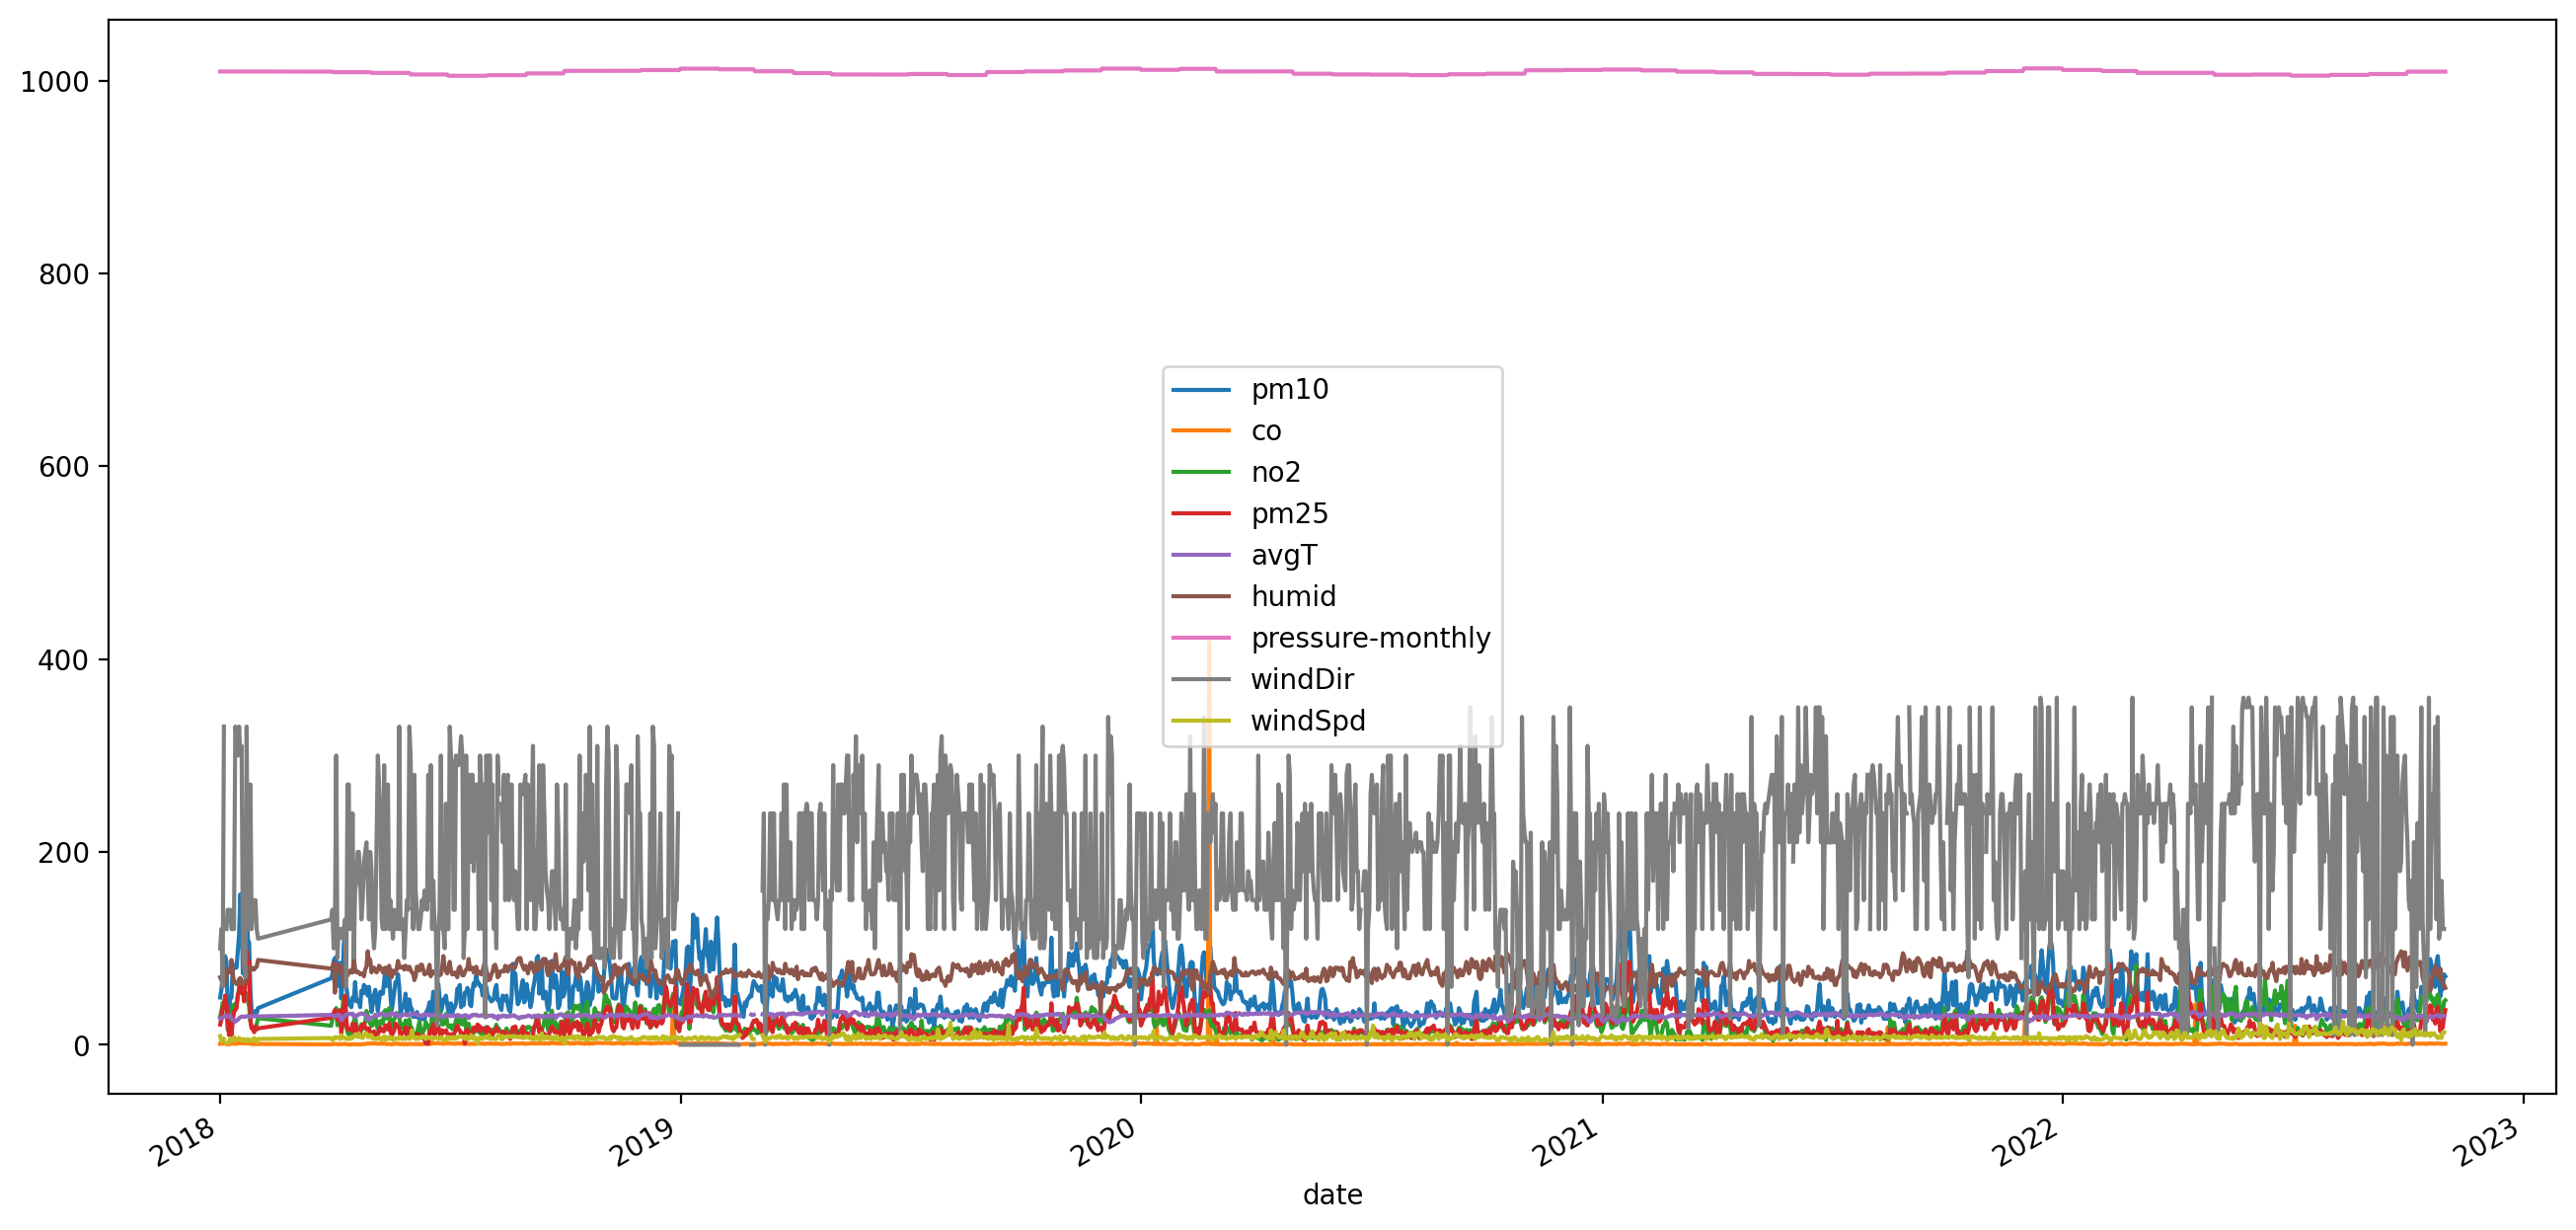

In [11]:
data.set_index('date').plot(figsize=(16, 8));

In [12]:
model=Prophet()

In [13]:
model.__dict__

{'growth': 'linear',
 'changepoints': None,
 'n_changepoints': 25,
 'specified_changepoints': False,
 'changepoint_range': 0.8,
 'yearly_seasonality': 'auto',
 'weekly_seasonality': 'auto',
 'daily_seasonality': 'auto',
 'holidays': None,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'changepoint_prior_scale': 0.05,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'interval_width': 0.8,
 'uncertainty_samples': 1000,
 'start': None,
 'y_scale': None,
 'logistic_floor': False,
 't_scale': None,
 'changepoints_t': None,
 'seasonalities': OrderedDict(),
 'extra_regressors': OrderedDict(),
 'country_holidays': None,
 'stan_fit': None,
 'params': {},
 'history': None,
 'history_dates': None,
 'train_component_cols': None,
 'component_modes': None,
 'train_holiday_names': None,
 'fit_kwargs': {},
 'stan_backend': <prophet.models.CmdStanPyBackend at 0x7faf6c364370>}

In [14]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuivu87gz/ixqg5rzh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuivu87gz/18cnn3uy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18689', 'data', 'file=/tmp/tmpuivu87gz/ixqg5rzh.json', 'init=/tmp/tmpuivu87gz/18cnn3uy.json', 'output', 'file=/tmp/tmpuivu87gz/prophet_model_5i4imiz/prophet_model-20230405094321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:43:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:43:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
df.tail()

,ds,y
1760,2022-10-27,14.0
1761,2022-10-28,17.0
1762,2022-10-29,18.0
1763,2022-10-30,29.0
1764,2022-10-31,36.0


In [16]:
future = model.make_future_dataframe(periods=180, freq='D')
future.tail()

,ds
1883,2023-04-25
1884,2023-04-26
1885,2023-04-27
1886,2023-04-28
1887,2023-04-29


In [17]:
future.head()

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05


In [18]:
forecast = model.predict(future)

In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,20.571372,21.195016,43.483405,20.571372,20.571372,12.013395,12.013395,12.013395,0.290310,0.290310,0.290310,11.723085,11.723085,11.723085,0.0,0.0,0.0,32.584767
1,2018-01-02,20.572220,22.504455,44.312172,20.572220,20.572220,12.504363,12.504363,12.504363,0.535373,0.535373,0.535373,11.968989,11.968989,11.968989,0.0,0.0,0.0,33.076583
2,2018-01-03,20.573069,21.601723,45.141121,20.573069,20.573069,13.117665,13.117665,13.117665,0.810366,0.810366,0.810366,12.307299,12.307299,12.307299,0.0,0.0,0.0,33.690734
3,2018-01-04,20.573917,21.916395,44.318059,20.573917,20.573917,12.602083,12.602083,12.602083,-0.132515,-0.132515,-0.132515,12.734598,12.734598,12.734598,0.0,0.0,0.0,33.176001
4,2018-01-05,20.574766,22.499143,45.832606,20.574766,20.574766,13.386403,13.386403,13.386403,0.141642,0.141642,0.141642,13.244761,13.244761,13.244761,0.0,0.0,0.0,33.961169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,2023-04-25,22.400996,7.768695,29.410569,22.368691,22.434039,-4.075089,-4.075089,-4.075089,0.535373,0.535373,0.535373,-4.610463,-4.610463,-4.610463,0.0,0.0,0.0,18.325907
1884,2023-04-26,22.401580,6.903464,29.927092,22.368957,22.435027,-4.045327,-4.045327,-4.045327,0.810366,0.810366,0.810366,-4.855693,-4.855693,-4.855693,0.0,0.0,0.0,18.356253
1885,2023-04-27,22.402164,5.582101,28.489384,22.369329,22.435899,-5.174598,-5.174598,-5.174598,-0.132515,-0.132515,-0.132515,-5.042083,-5.042083,-5.042083,0.0,0.0,0.0,17.227566
1886,2023-04-28,22.402747,5.131473,28.942650,22.369677,22.436654,-5.028601,-5.028601,-5.028601,0.141642,0.141642,0.141642,-5.170243,-5.170243,-5.170243,0.0,0.0,0.0,17.374147


In [20]:
df

,ds,y
0,2018-01-01,21.0
1,2018-01-02,26.0
2,2018-01-03,38.0
3,2018-01-04,39.0
4,2018-01-05,51.0
...,...,...
1760,2022-10-27,14.0
1761,2022-10-28,17.0
1762,2022-10-29,18.0
1763,2022-10-30,29.0


In [21]:
dfcst=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,32.584767,21.195016,43.483405
1,2018-01-02,33.076583,22.504455,44.312172
2,2018-01-03,33.690734,21.601723,45.141121
3,2018-01-04,33.176001,21.916395,44.318059
4,2018-01-05,33.961169,22.499143,45.832606
...,...,...,...,...
1883,2023-04-25,18.325907,7.768695,29.410569
1884,2023-04-26,18.356253,6.903464,29.927092
1885,2023-04-27,17.227566,5.582101,28.489384
1886,2023-04-28,17.374147,5.131473,28.942650


In [22]:
dt=pd.merge(df, dfcst, left_on='ds', right_on='ds')
dt

,ds,y,yhat,yhat_lower,yhat_upper
0,2018-01-01,21.0,32.584767,21.195016,43.483405
1,2018-01-02,26.0,33.076583,22.504455,44.312172
2,2018-01-03,38.0,33.690734,21.601723,45.141121
3,2018-01-04,39.0,33.176001,21.916395,44.318059
4,2018-01-05,51.0,33.961169,22.499143,45.832606
...,...,...,...,...,...
1703,2022-10-27,14.0,24.880539,13.655272,35.978776
1704,2022-10-28,17.0,25.821433,14.715192,37.175969
1705,2022-10-29,18.0,25.737874,15.475237,38.245542
1706,2022-10-30,29.0,25.879691,13.535449,36.945721


In [23]:
dt.shape

(1708, 5)

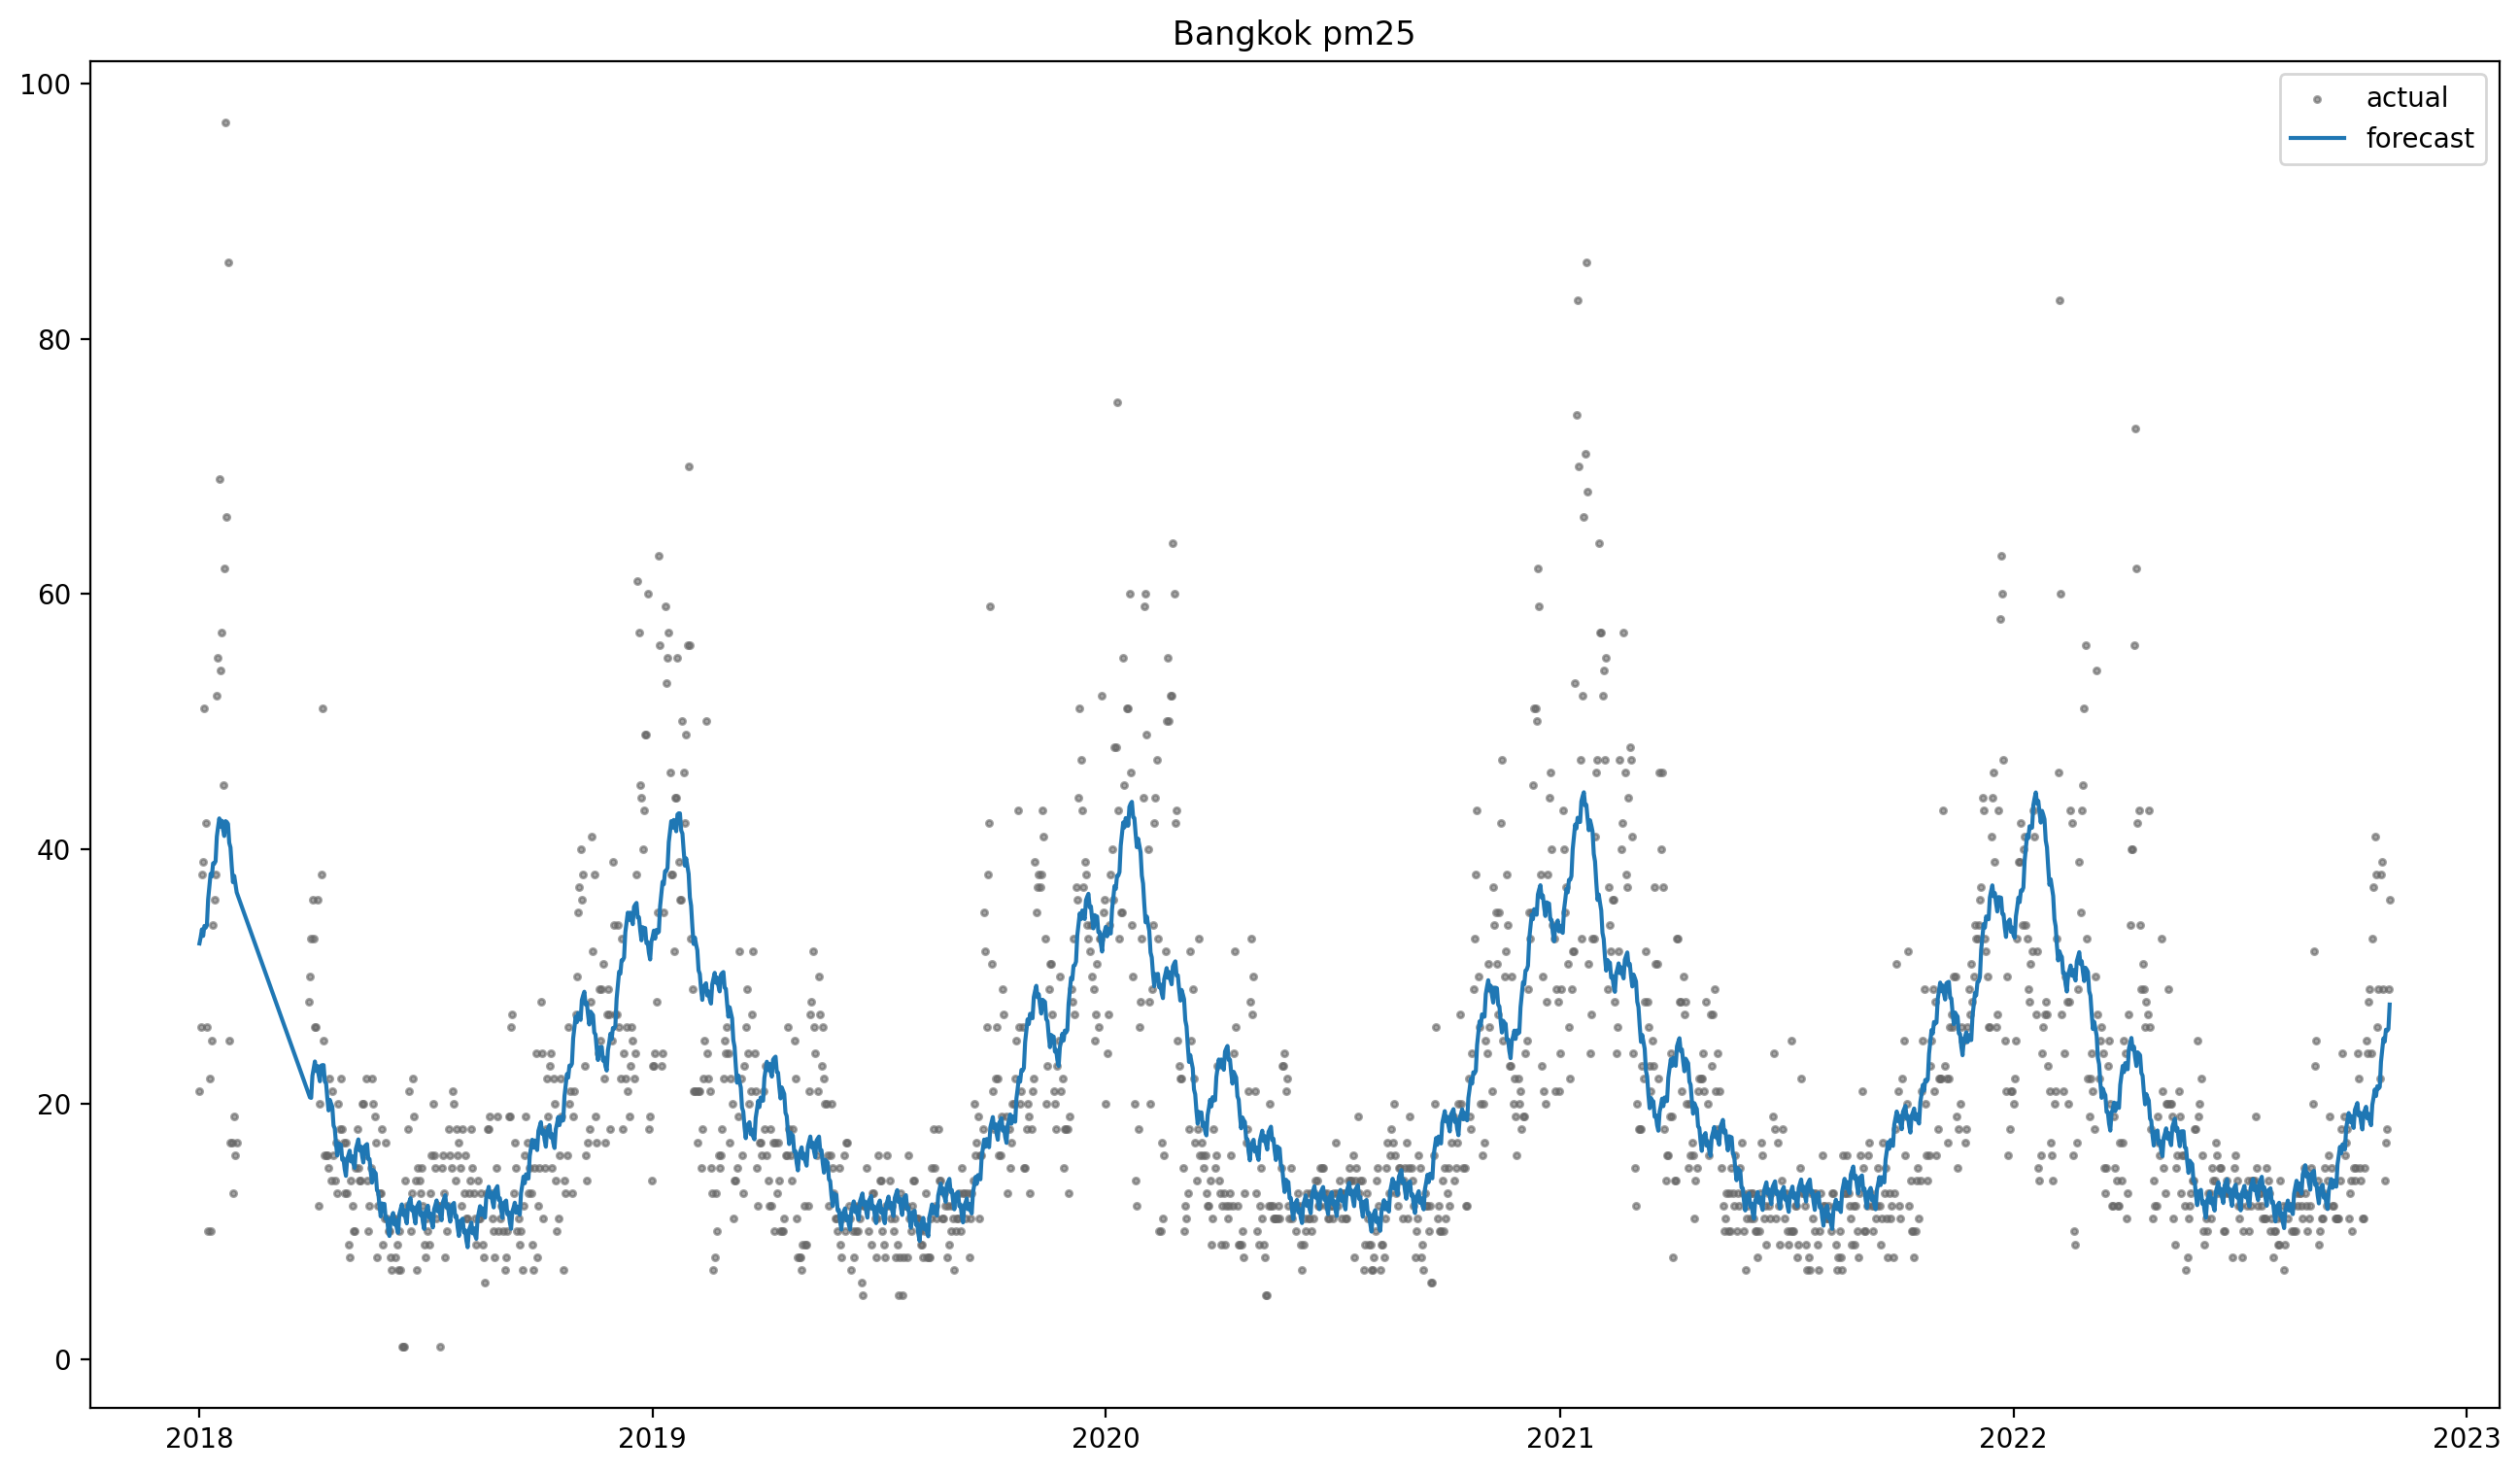

In [24]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt['ds'], dt['yhat'], label='forecast')
plt.title(f'Bangkok {y_col}')
plt.legend();

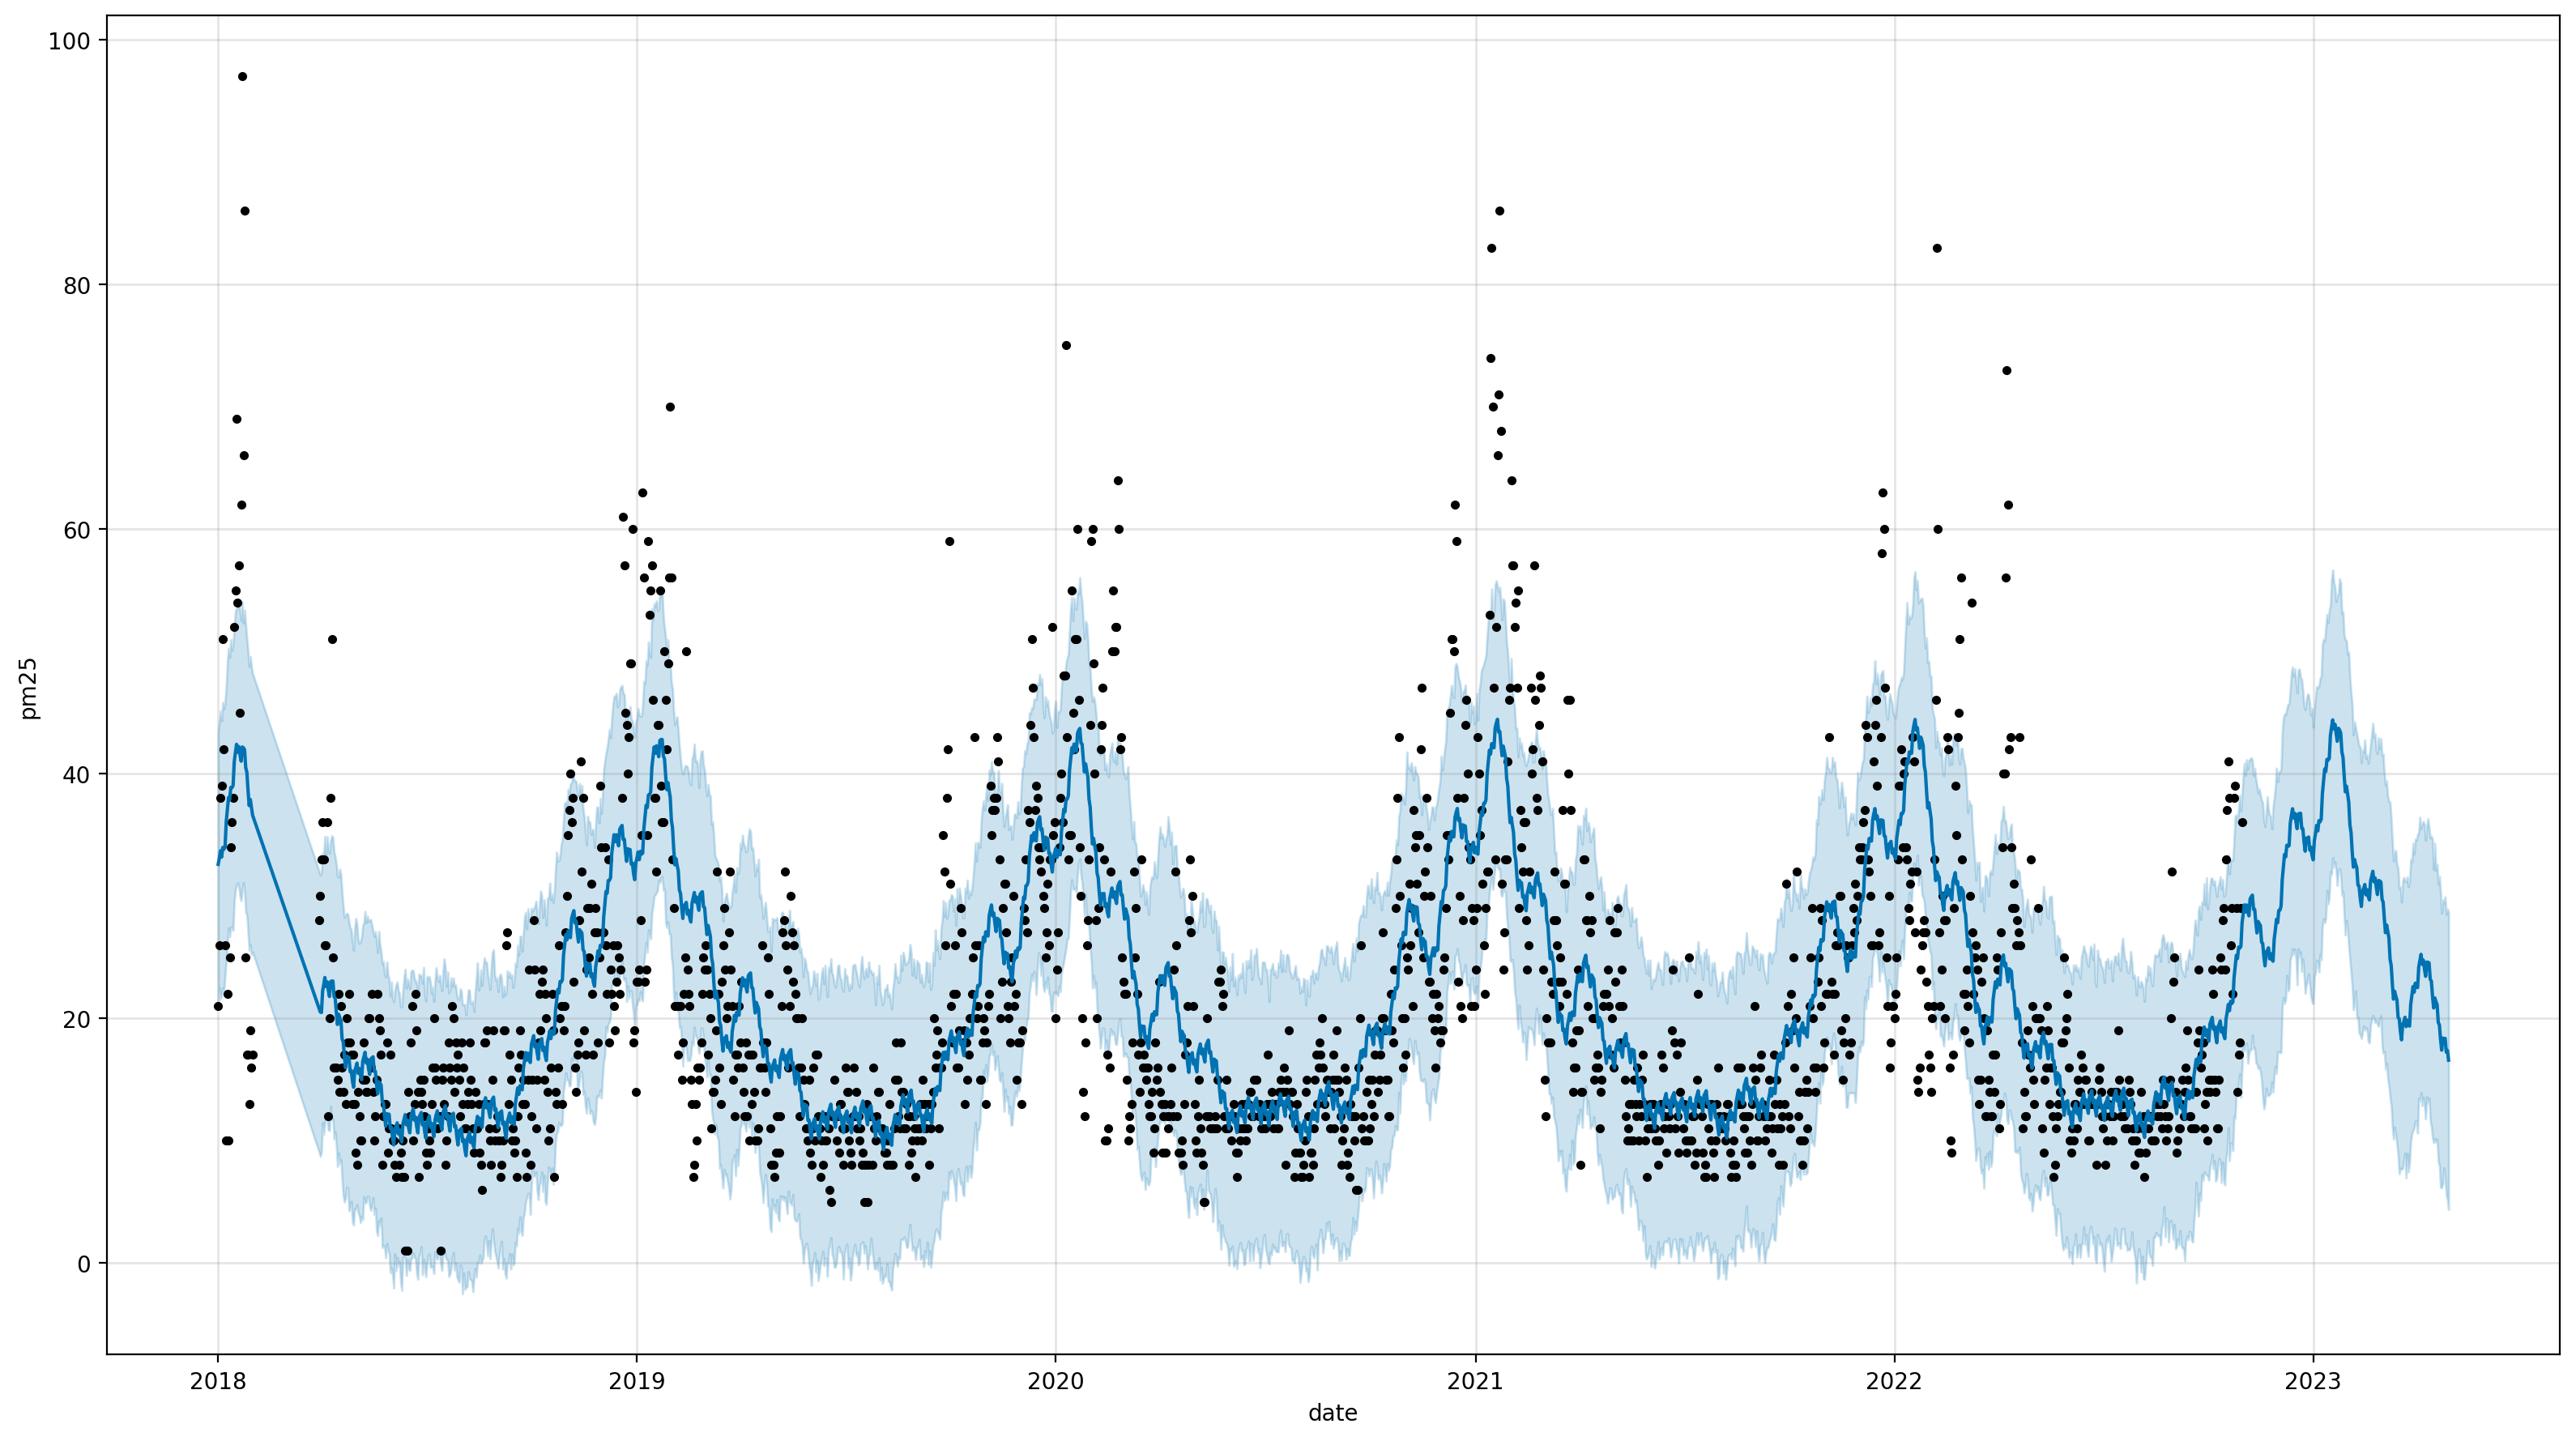

In [25]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date', ylabel=y_col)

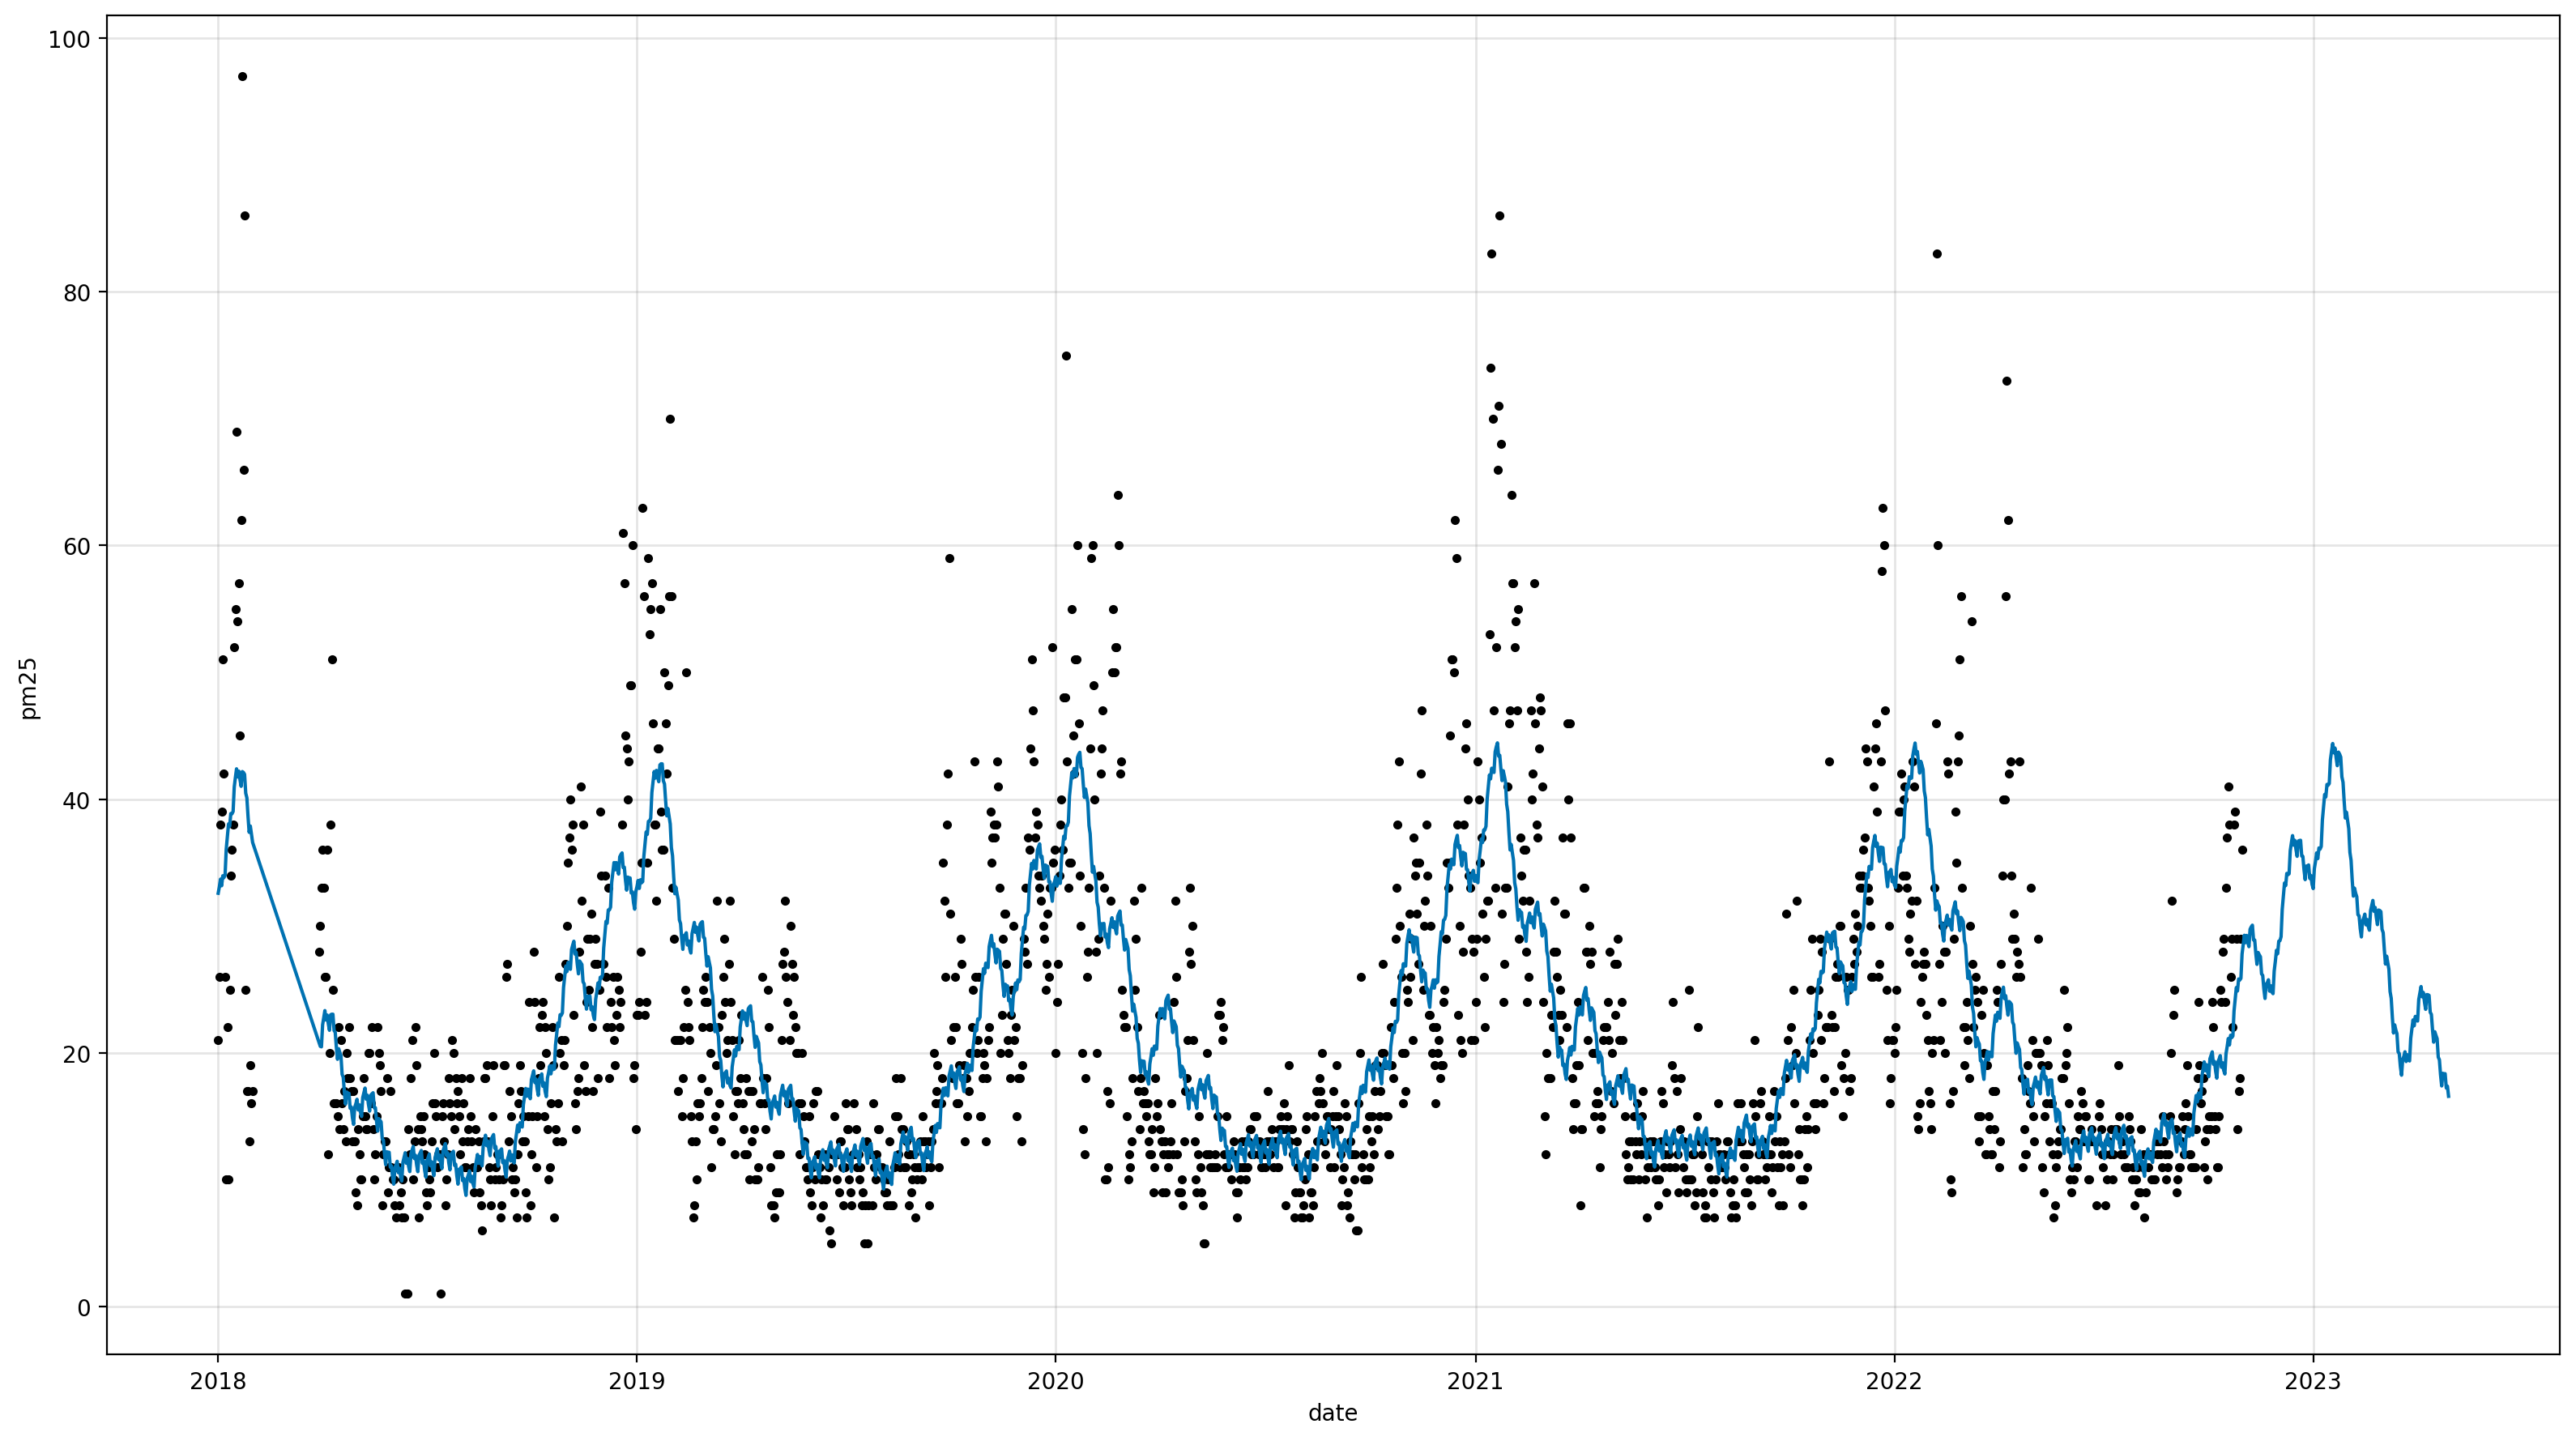

In [26]:
fig=model.plot(forecast, uncertainty=False, figsize=(16, 9), xlabel='date', ylabel=y_col)

In [27]:
dfcstnew = forecast.tail(180)

In [28]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'})
ypred

,ds,yhat
1708,2022-11-01,28.549193
1709,2022-11-02,29.267832
1710,2022-11-03,28.693983
1711,2022-11-04,29.256033
1712,2022-11-05,28.729105
...,...,...
1883,2023-04-25,18.325907
1884,2023-04-26,18.356253
1885,2023-04-27,17.227566
1886,2023-04-28,17.374147


In [29]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'}).round(0).head(7)
ypred

,ds,yhat
1708,2022-11-01,29.0
1709,2022-11-02,29.0
1710,2022-11-03,29.0
1711,2022-11-04,29.0
1712,2022-11-05,29.0
1713,2022-11-06,28.0
1714,2022-11-07,30.0


In [30]:
ypred.mean().round(0)

<ipython-input-30-2ab64095c772>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ypred.mean().round(0)


yhat    29.0
dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [32]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [33]:
r2_score(metric_df.y, metric_df.yhat) #score

0.5049314794947123

In [34]:
mse = mean_squared_error(metric_df.y, metric_df.yhat) #mse
mse

80.67570265775436

In [35]:
import math
#mse = np.square(np.subtract(metric_df.y,metric_df.yhat)).mean() 
mse = mean_squared_error(metric_df.y, metric_df.yhat)
ans = math.sqrt(mse) 
ans

8.981965411743376